In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#preparing and cleaning data
db=pd.read_csv("Salary_Data_Based_country_and_race.csv")
db.loc[db["Education Level"]=="Bachelor's Degree", "Education Level"]="Bachelor's"
db.loc[db["Education Level"]=="phD", "Education Level"]="PhD"
db.loc[db["Education Level"]=="Master's Degree", "Education Level"]="Master's"
print(db.head())


   Unnamed: 0   Age  Gender Education Level          Job Title  \
0           0  32.0    Male      Bachelor's  Software Engineer   
1           1  28.0  Female        Master's       Data Analyst   
2           2  45.0    Male             PhD     Senior Manager   
3           3  36.0  Female      Bachelor's    Sales Associate   
4           4  52.0    Male        Master's           Director   

   Years of Experience    Salary Country      Race  
0                  5.0   90000.0      UK     White  
1                  3.0   65000.0     USA  Hispanic  
2                 15.0  150000.0  Canada     White  
3                  7.0   60000.0     USA  Hispanic  
4                 20.0  200000.0     USA     Asian  


<Axes: >

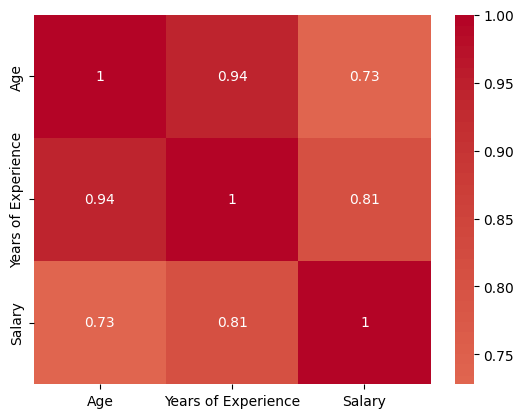

In [168]:
sns.heatmap(db[["Age", "Years of Experience", "Salary"]].corr(), annot=True, cmap="coolwarm", center=0)

C:\Users\stefa\AppData\Local\Temp\ipykernel_23952\670894582.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


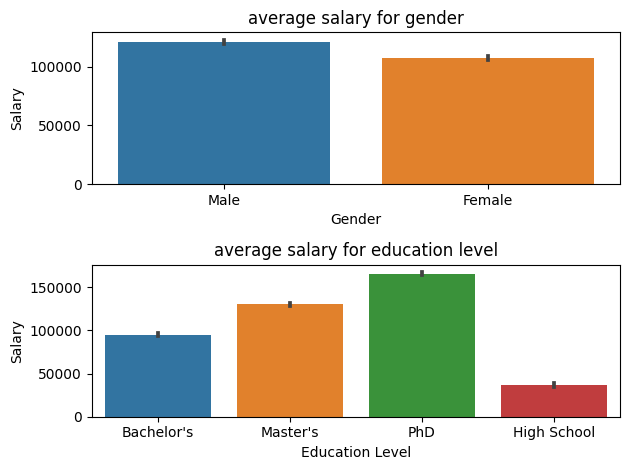

In [30]:
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
sns.barplot(x="Gender", y="Salary", data=db.query("Gender=='Male' or Gender=='Female'"), ax=ax1)
ax1.set_title("average salary for gender")
plt.tight_layout()
sns.barplot(x="Education Level", y=("Salary"), data=db, ax=ax2)
ax2.set_title("average salary for education level")
plt.tight_layout()
# print(db.query("Gender=='Male' or Gender=='Female'"))

LinearRegression(slope=4319.482946438988, intercept=76416.38474182725)


Text(0.5, 1.0, 'relation between salary and years of experience')

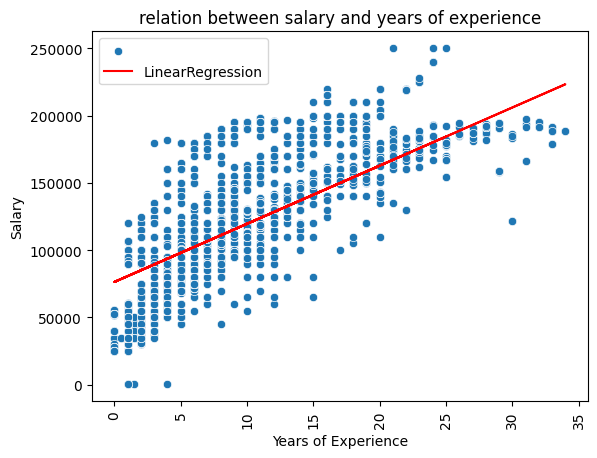

In [92]:

# fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
import statistics as st
sns.scatterplot(x="Years of Experience", y="Salary", data=db)
plt.xticks(rotation=90)
expyear=[x for x in db["Years of Experience"].drop_duplicates().sort_values()][:-1]
avgsal=((db[["Salary","Years of Experience"]].groupby("Years of Experience")).mean()["Salary"]).reset_index()
print(st.linear_regression(expyear,list(avgsal["Salary"])))
intercept=76416.38474182725
slope=4319.482946438988
plt.plot(db["Years of Experience"],intercept+slope*db["Years of Experience"], color="red")
plt.legend(["","LinearRegression"])
plt.title("relation between salary and years of experience")
# print(avgsal)

   Unnamed: 0   Age  Gender Education Level          Job Title  \
0           0  32.0    Male      Bachelor's  Software Engineer   
1           1  28.0  Female        Master's       Data Analyst   
2           2  45.0    Male             PhD     Senior Manager   
3           3  36.0  Female      Bachelor's    Sales Associate   
4           4  52.0    Male        Master's           Director   

   Years of Experience    Salary Country      Race  
0                  5.0   90000.0      UK     White  
1                  3.0   65000.0     USA  Hispanic  
2                 15.0  150000.0  Canada     White  
3                  7.0   60000.0     USA  Hispanic  
4                 20.0  200000.0     USA     Asian  


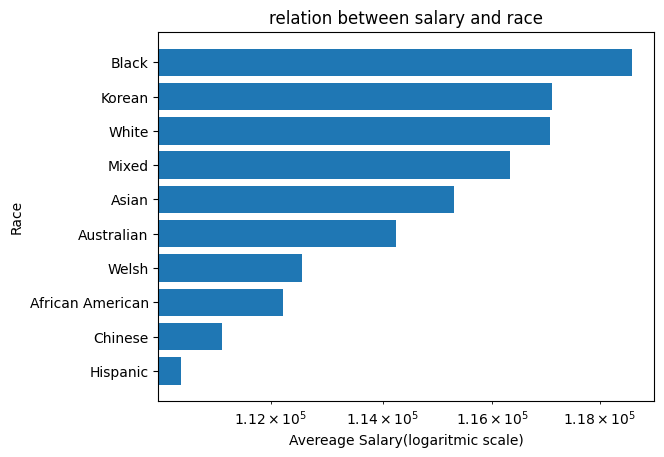

In [170]:
print(db.head())
gru=(db[["Salary","Race"]].groupby("Race").mean()["Salary"]).reset_index().sort_values(by="Salary")
plt.barh(gru["Race"], gru["Salary"])
plt.ylabel("Race")
plt.xlabel("Avereage Salary(logaritmic scale)")
plt.title("relation between salary and race")
plt.xscale("log")
plt.show()



                    Job Title         Salary
190             VP of Finance  200000.000000
28   Director of Data Science  204561.403509
8          Chief Data Officer  220000.000000
7                         CEO  250000.000000
9    Chief Technology Officer  250000.000000


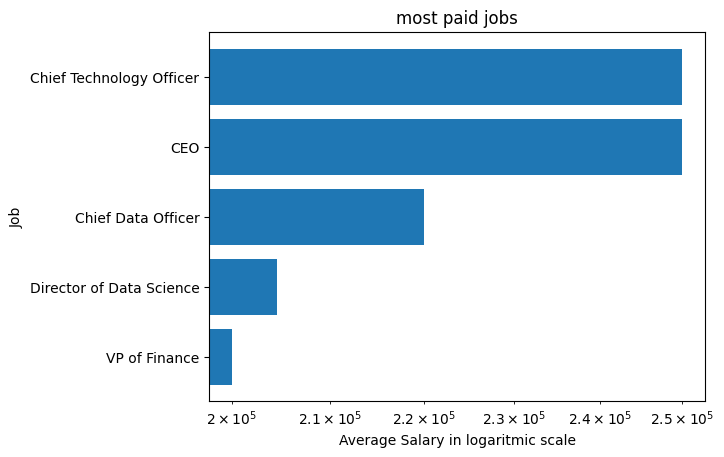

In [178]:
# print(db.head())
job=db[["Salary", "Job Title"]].groupby("Job Title").mean()["Salary"].reset_index().sort_values(by="Salary",ascending=False)
jobpaid=job.head(5).sort_values(by="Salary")
jobunpaid=job[:-1].tail(5).sort_values(by="Salary")
print(jobpaid)

# fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
plt.barh(jobpaid["Job Title"],jobpaid["Salary"])
plt.title("most paid jobs")
plt.xticks(rotation=90)
plt.tight_layout
plt.xlabel("Average Salary in logaritmic scale")
plt.ylabel("Job")
plt.xscale("log")
plt.show()

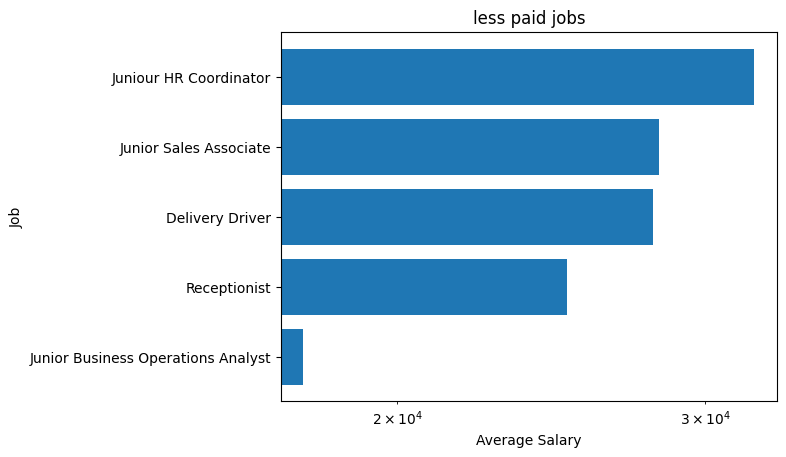

In [177]:
plt.barh(jobunpaid["Job Title"],jobunpaid["Salary"])
plt.title("less paid jobs")
plt.xlabel("Average Salary in logaritmic scale")
plt.ylabel("Job")
plt.xscale("log")

   Unnamed: 0   Age  Gender Education Level          Job Title  \
0           0  32.0    Male      Bachelor's  Software Engineer   
1           1  28.0  Female        Master's       Data Analyst   
2           2  45.0    Male             PhD     Senior Manager   
3           3  36.0  Female      Bachelor's    Sales Associate   
4           4  52.0    Male        Master's           Director   

   Years of Experience    Salary Country      Race  
0                  5.0   90000.0      UK     White  
1                  3.0   65000.0     USA  Hispanic  
2                 15.0  150000.0  Canada     White  
3                  7.0   60000.0     USA  Hispanic  
4                 20.0  200000.0     USA     Asian  
               Race  count
0          Hispanic    322
1             Welsh    333
2             Mixed    334
3  African American    354
4             Black    437
5           Chinese    444
6        Australian    452
7            Korean    457
8             Asian   1603
9             W

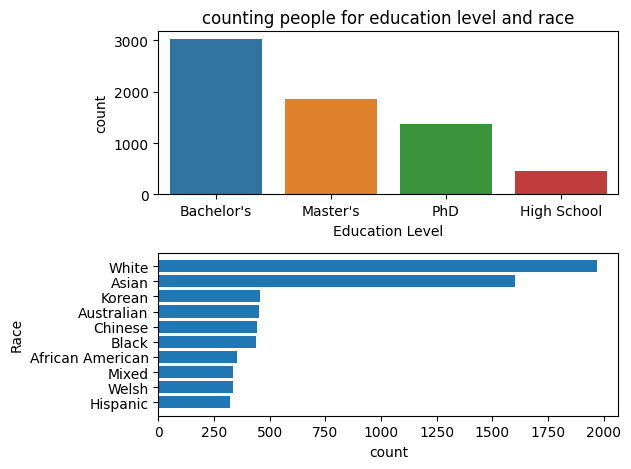

In [175]:
print(db.head())
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
sns.countplot(x="Education Level",  data=db, ax=ax1)
ax1.set_title("counting people for education level and race")
racecount=db["Race"].value_counts(ascending=True).reset_index()
print(racecount)
ax2.barh(racecount["Race"], racecount["count"])
plt.xlabel("count")
plt.ylabel("Race")
plt.tight_layout()